In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Variables
COLORS = sns.color_palette('pastel')
DPI = 300
BBOX = 'tight'

In [2]:
df_clean = pd.read_csv("data/listings_cleaned.csv.gz", index_col=0, compression="gzip")
df_og = pd.read_csv("data/listings.csv.gz", index_col=0, compression="gzip")
og_price = df_og['price'].str.replace('$', '').str.replace(',', '').astype(float)

---

## Comparison Between Original and Cleaned Data

Comparison between data types of the two datasets

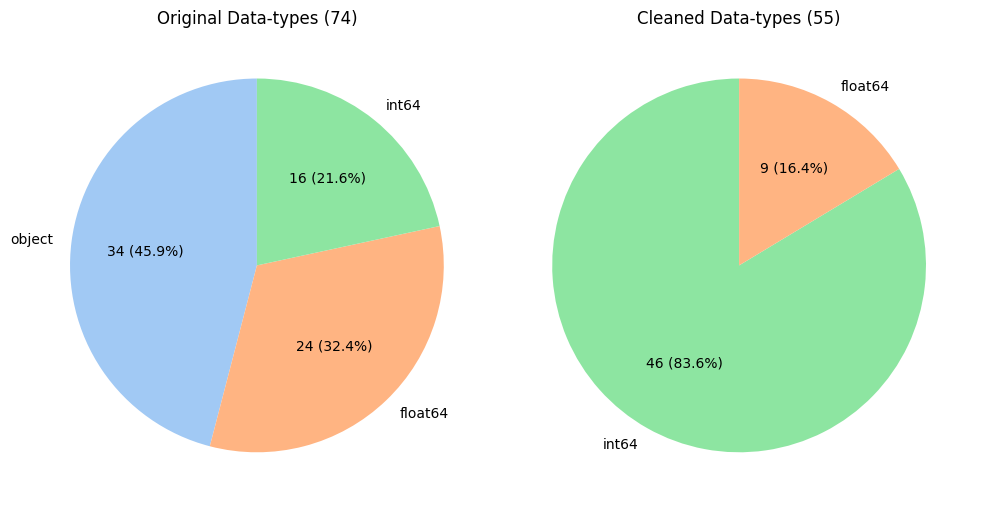

In [3]:
# Create color mappings for the dtypes
o_counts = df_og.dtypes.value_counts()
c_counts = df_clean.dtypes.value_counts()

all_dtypes = pd.concat([o_counts, c_counts], axis=1).fillna(0).set_axis(['Original', 'Cleaned'], axis=1)
color_map = {dtype: color for dtype, color in zip(all_dtypes.index, COLORS[:len(all_dtypes)])}

# Function to show both the percentage and the count of each data type
def count_and_pct(pct, data: pd.DataFrame):
    return f"{round(len(data.columns) * pct / 100)} ({pct:.1f}%)"

# Plot the pie charts
plt.figure(figsize=(10, 6))

# Original Dataset
plt.subplot(1,2,1)
plt.pie(o_counts, labels=o_counts.index.astype(str), autopct=lambda pct: count_and_pct(pct, df_og), colors=[color_map[d] for d in o_counts.index], startangle=90)
plt.title(f'Original Data-types ({len(df_og.columns)})')

# Cleaned Dataset
plt.subplot(1,2,2)
plt.pie(c_counts, labels=c_counts.index.astype(str), autopct=lambda pct: count_and_pct(pct, df_clean), colors=[color_map[d] for d in c_counts.index], startangle=90)
plt.title(f'Cleaned Data-types ({len(df_clean.columns)})')

plt.tight_layout()
plt.savefig('figures/analysis/data_types.png', dpi=DPI, bbox_inches=BBOX)
plt.show();

Comparison between the distributions of the prices of the listings in the cleaned dataset and the original dataset.

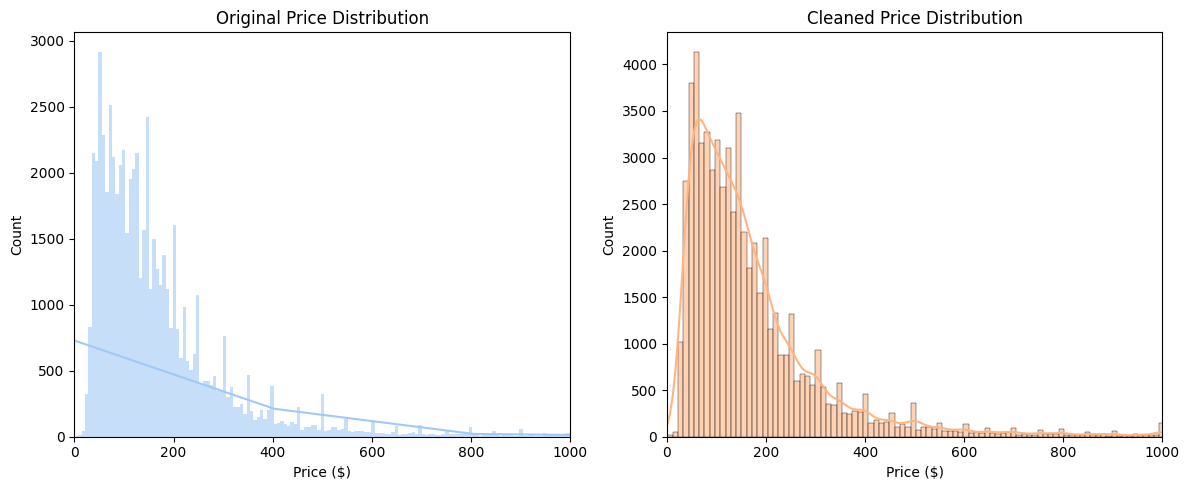

In [4]:
plt.figure(figsize=(12,5))

# Original Data
plt.subplot(1,2,1)
sns.histplot(og_price, bins='auto', kde=True, color=COLORS[0], alpha=0.6)
plt.title("Original Price Distribution")
plt.xlabel("Price ($)")
plt.xlim(0, 1000)

# Cleaned Data
plt.subplot(1,2,2)
sns.histplot(df_clean['price'], bins=100, kde=True, color=COLORS[1], alpha=0.6)
plt.title("Cleaned Price Distribution")
plt.xlabel("Price ($)")
plt.xlim(0, 1000)

plt.tight_layout()
plt.savefig("figures/analysis/price_distribution.png", dpi=DPI, bbox_inches=BBOX)
plt.show();

Outlier Detection before and after cleaning, through boxplot visualization

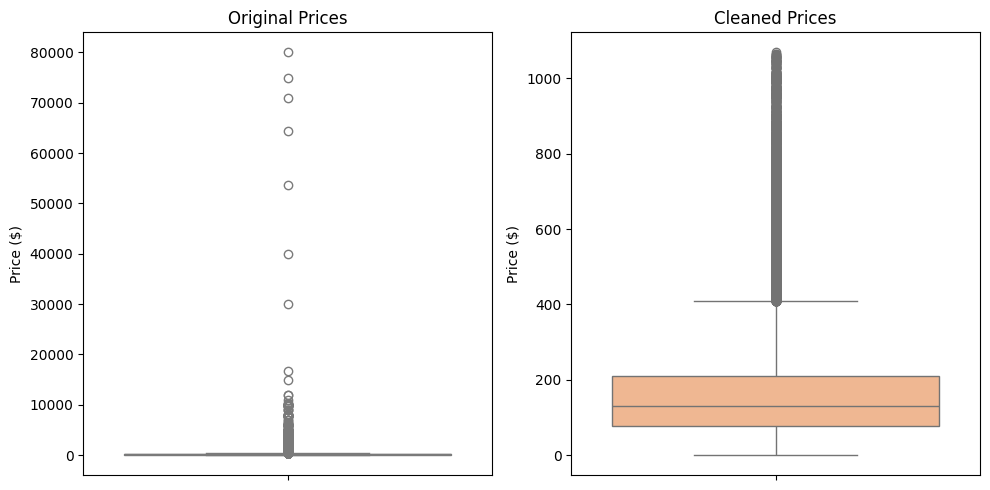

In [5]:
plt.figure(figsize=(10,5))

# Original Data
plt.subplot(1,2,1)
sns.boxplot(y=og_price, color=COLORS[0])
plt.title('Original Prices')
plt.ylabel('Price ($)')

# Cleaned Data
plt.subplot(1,2,2)
sns.boxplot(y=df_clean['price'], color=COLORS[1])
plt.title('Cleaned Prices')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.savefig('figures/analysis/boxplot_prices.png', dpi=DPI, bbox_inches=BBOX)
plt.show();

---

## Visualizations of the Cleaned Data

Create a feature correlation heatmap to visualize the relationships between the features.

In [10]:
df_clean.iloc[:, :18]

,host_since,host_response_time,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,first_review,review_scores_rating,instant_bookable,reviews_per_month
id,,,,,,,,,,,,,,,,,,
56229,5298.0,3.0,0,11.0,1,1,2,1.5,1.0,24,89.0,5,365,145,5240.0,4.71,0,0.84
62970,5169.0,2.0,1,47.0,1,1,6,3.0,3.0,28,220.0,1,1125,178,5170.0,4.52,1,1.05
63948,5298.0,3.0,0,11.0,1,1,2,1.0,1.0,19,88.0,3,730,170,4912.0,4.61,0,1.06
66772,5298.0,3.0,0,11.0,1,1,2,1.0,1.0,27,75.0,3,1125,186,5160.0,4.65,0,1.10
69198,5161.0,NaN,0,1.0,1,1,1,1.0,1.0,13,53.0,3,730,13,4626.0,4.46,0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307783883910087285,1110.0,NaN,0,1.0,0,1,5,2.0,2.0,11,236.0,2,365,0,NaN,NaN,1,NaN
1307790077052719025,3370.0,NaN,0,2.0,1,1,2,1.0,2.0,7,88.0,5,30,0,NaN,NaN,0,NaN
1307791573107143159,2840.0,1.0,0,112.0,1,1,6,2.0,1.0,32,93.0,1,7,0,NaN,NaN,0,NaN


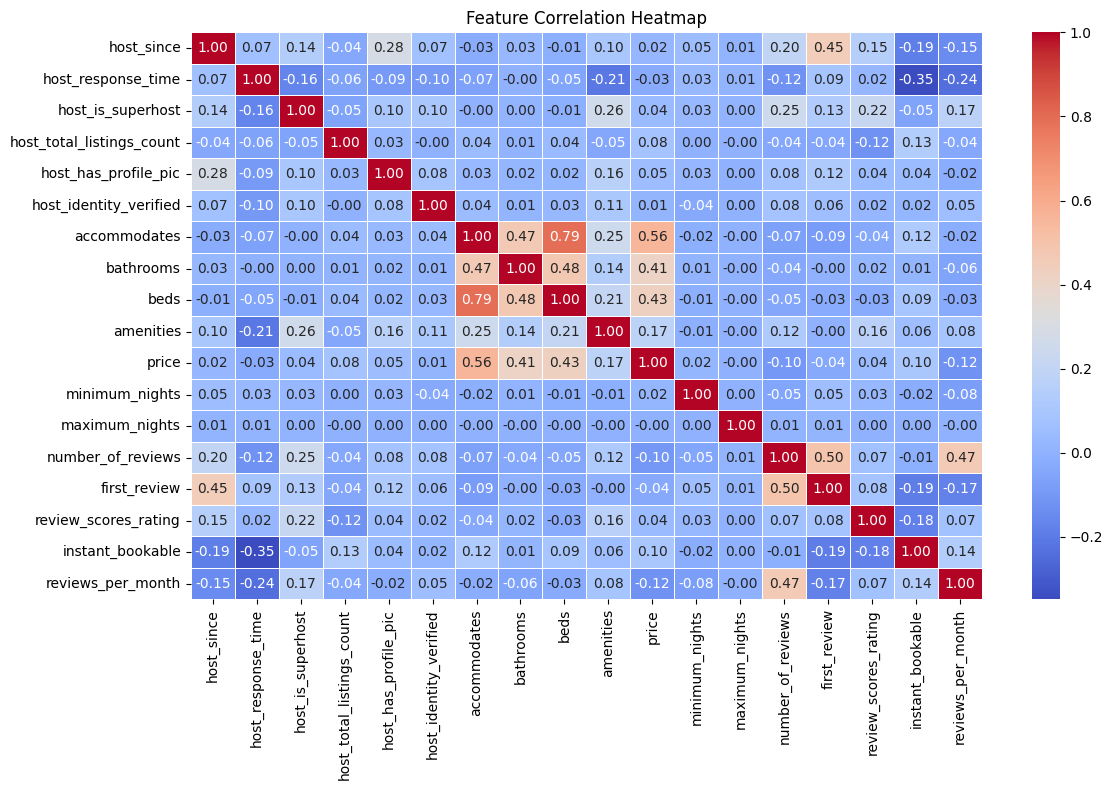

In [13]:
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.iloc[:, :18].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.savefig("figures/analysis/feature_correlation_heatmap.png", dpi=DPI, bbox_inches=BBOX)
plt.show();

Plot the correlation matrix for the numerical features with the highest correlation to the price

<Figure size 1000x800 with 0 Axes>

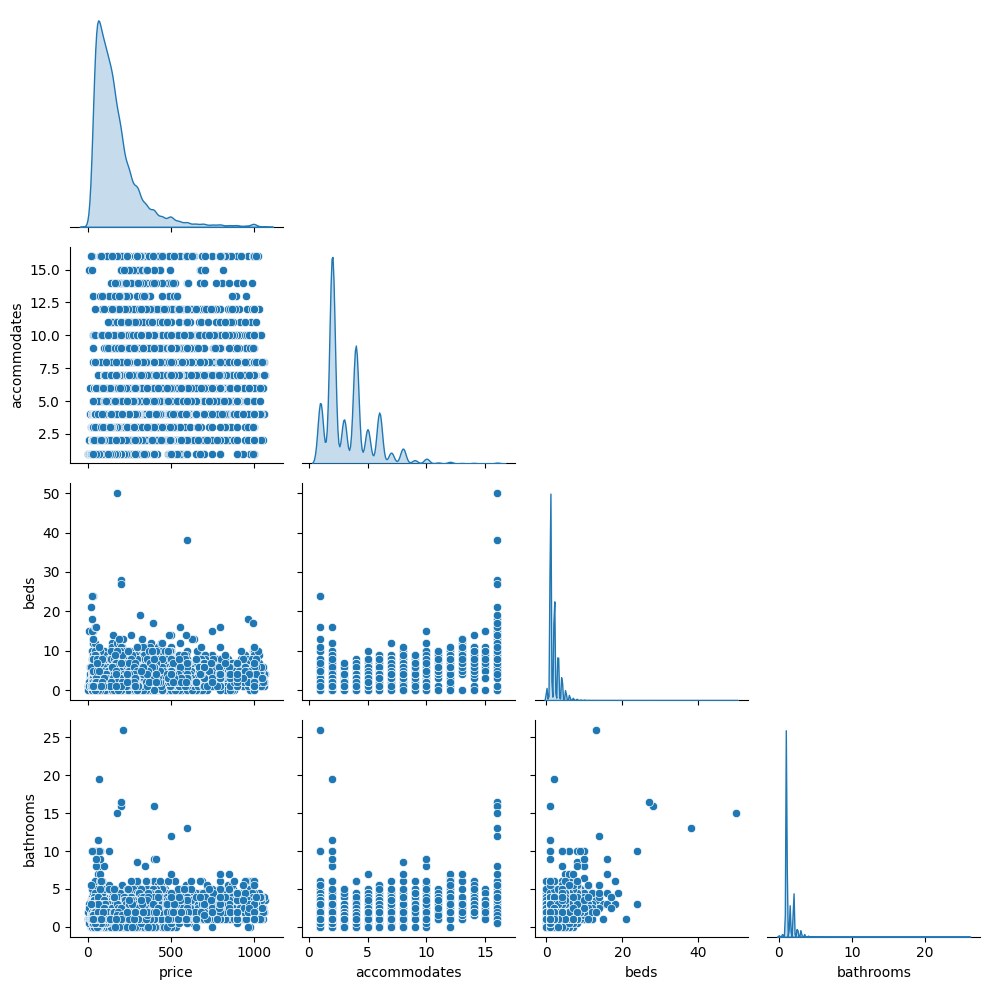

In [15]:
data = df_clean[['price', 'accommodates', 'beds', 'bathrooms']]
plt.figure(figsize=(10, 8))
sns.pairplot(data, diag_kind='kde', palette=COLORS, corner=True)

plt.tight_layout()
plt.savefig('figures/analysis/pair_plot.png', dpi=DPI, bbox_inches=BBOX)
plt.show();

---

## Check for Normality

Use multiple tests to numerically test if the price could be normally distributed.

In [16]:
# Shapiro-Wilk Test
stat, p_value = stats.shapiro(df_clean['price'])
print("Shapiro-Wilk Test:")
print("Statistic:", stat)
print("p-value:", p_value)
print("Verdict: ", "Reject Normality" if p_value < 0.05 else "Fail to reject Normality")

# Anderson-Darling Test
result = stats.anderson(df_clean['price'], dist='norm')
print("\nAnderson-Darling Test:")
print("Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)
print("Verdict: ", "Reject Normality" if result.statistic > result.critical_values[2] else "Fail to reject Normality")

# D'Agostino and Pearson's Test
stat, p_value = stats.normaltest(df_clean['price'])
print("\nD'Agostino and Pearson's Test:")
print("Statistic:", stat)
print("p-value:", p_value)
print("Verdict: ", "Reject Normality" if p_value < 0.05 else "Fail to reject Normality")

# Kolmogorov-Smirnov Test
stat, p_value = stats.kstest(df_clean['price'], 'norm', args=(df_clean['price'].mean(), df_clean['price'].std()))
print("\nKolmogorov-Smirnov Test:")
print("Statistic:", stat)
print("p-value:", p_value)
print("Verdict: ", "Reject Normality" if p_value < 0.05 else "Fail to reject Normality")

Shapiro-Wilk Test:
Statistic: 0.7632386466378385
p-value: 2.845484468998022e-125
Verdict:  Reject Normality

Anderson-Darling Test:
Statistic: 3544.4474824428326
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
Verdict:  Reject Normality

D'Agostino and Pearson's Test:
Statistic: 32567.187916220817
p-value: 0.0
Verdict:  Reject Normality

Kolmogorov-Smirnov Test:
Statistic: 0.15847856065868993
p-value: 0.0
Verdict:  Reject Normality


Plot the Q-Q Plot to visualy check for normality.

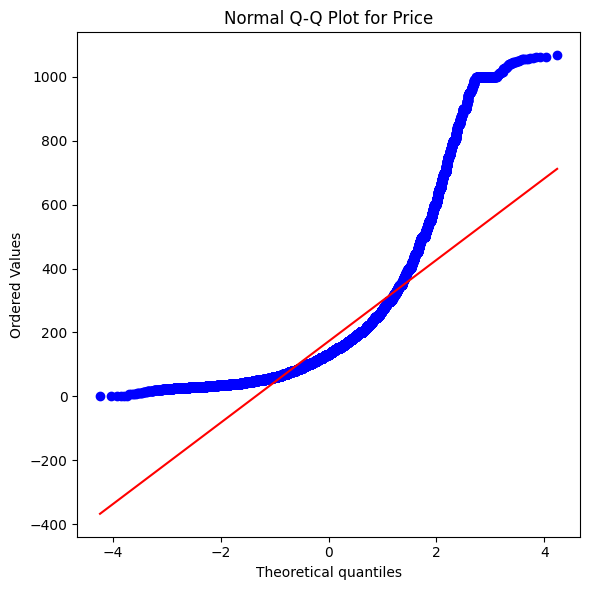

In [17]:
plt.figure(figsize=(6,6))
stats.probplot(df_clean['price'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot for Price')

plt.tight_layout()
plt.savefig('figures/analysis/normal_qq_plot.png', dpi=DPI, bbox_inches=BBOX)
plt.show();